#🚖 Uber Ride Analysis (NCR Region)


## 📌 Project Overview
This project analyzes Uber ride booking data for the NCR region.  
The main objectives are:
- Identify booking trends by time, day, and month.
- Understand rush hour patterns.
- Analyze popular vehicle types.
- Study payment methods and customer preferences.
- Derive business insights for revenue optimization.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


##📥 Data Loading & Overview

In [ ]:
df = pd.read_csv('ncr_ride_bookings.csv')
df.sample(10)

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Reason for cancelling by Customer,Cancelled Rides by Driver,Driver Cancellation Reason,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method
121800,2024-02-04,15:40:48,"""CNR3653703""",Completed,"""CID3481911""",Go Sedan,Hauz Khas,Badshahpur,11.5,32.0,...,NaN,NaN,NaN,NaN,NaN,1374.0,35.80,4.4,4.5,UPI
106951,2024-06-04,08:08:17,"""CNR5152543""",Completed,"""CID2858390""",Go Sedan,Botanical Garden,Noida Sector 62,5.3,39.8,...,NaN,NaN,NaN,NaN,NaN,504.0,17.62,4.6,4.9,UPI
72258,2024-04-28,14:24:31,"""CNR5093125""",Cancelled by Customer,"""CID6583051""",Go Mini,India Gate,Azadpur,9.8,NaN,...,Driver asked to cancel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7100,2024-04-08,21:09:18,"""CNR3333021""",No Driver Found,"""CID6149725""",Premier Sedan,Rajouri Garden,Cyber Hub,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
38933,2024-11-02,13:35:12,"""CNR9591106""",Completed,"""CID1717601""",Auto,Tilak Nagar,Model Town,14.6,21.1,...,NaN,NaN,NaN,NaN,NaN,356.0,41.51,4.4,4.0,UPI
92811,2024-03-01,08:19:11,"""CNR9613777""",Completed,"""CID5391410""",Go Mini,Jama Masjid,AIIMS,5.7,39.4,...,NaN,NaN,NaN,NaN,NaN,388.0,36.69,4.7,4.0,UPI
70262,2024-06-08,20:08:41,"""CNR2725194""",Completed,"""CID8201947""",Premier Sedan,Vidhan Sabha,Greater Kailash,2.3,36.5,...,NaN,NaN,NaN,NaN,NaN,726.0,28.16,4.6,4.9,Credit Card
26531,2024-09-16,13:43:05,"""CNR4786046""",Completed,"""CID4133048""",Go Sedan,Pragati Maidan,Gurgaon Sector 56,14.4,34.6,...,NaN,NaN,NaN,NaN,NaN,386.0,19.23,4.3,4.9,Debit Card
139769,2024-02-04,08:53:41,"""CNR8606029""",Completed,"""CID3414801""",Bike,Kirti Nagar,Udyog Vihar,14.3,36.4,...,NaN,NaN,NaN,NaN,NaN,121.0,40.19,4.5,5.0,UPI
70854,2024-08-19,09:24:07,"""CNR8743009""",Completed,"""CID3211042""",Bike,Shivaji Park,Narsinghpur,12.6,25.2,...,NaN,NaN,NaN,NaN,NaN,132.0,28.64,4.6,5.0,Cash


In [ ]:
df.columns

Index(['Date', 'Time', 'Booking ID', 'Booking Status', 'Customer ID',
       'Vehicle Type', 'Pickup Location', 'Drop Location', 'Avg VTAT',
       'Avg CTAT', 'Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason', 'Booking Value', 'Ride Distance',
       'Driver Ratings', 'Customer Rating', 'Payment Method'],
      dtype='object')

In [ ]:
df.shape

(150000, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

##🧹 Data Cleaning & Feature Engineering

In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df['Time']= pd.to_datetime(df['Time'])
df["Day"] = df["Date"].dt.day_name()
df['Month_name'] = df['Date'].dt.month_name()
df['Hour']= df['Time'].dt.hour

In [ ]:
def is_rush_hour(hour):
  if  hour> 7 and hour < 10:
    return 1
  elif hour> 17 and hour < 21:
    return 1
  else:
    return 0

In [ ]:
df['Rush Hour'] = df['Hour'].apply(is_rush_hour)

In [ ]:
def time_of_day(hour):
  if  hour> 7 and hour < 12:
    return 'Morning'

  elif hour> 12 and hour < 17:
    return 'Afternoon'

  elif hour> 17 and hour < 21:
    return 'Evening'

  else:
    return 'Night'

In [ ]:
df['Time of Day'] = df['Hour'].apply(time_of_day)

In [ ]:
from sklearn.impute import SimpleImputer

In [ ]:
imputer = SimpleImputer(strategy='mean')

In [ ]:
df[[ 'Avg VTAT','Avg CTAT','Driver Ratings', 'Customer Rating','Booking Value', 'Ride Distance']] =imputer.fit_transform(df[[ 'Avg VTAT','Avg CTAT','Driver Ratings', 'Customer Rating','Booking Value', 'Ride Distance']])

In [ ]:
df[['Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason']]=df[['Cancelled Rides by Customer',
       'Reason for cancelling by Customer', 'Cancelled Rides by Driver',
       'Driver Cancellation Reason', 'Incomplete Rides',
       'Incomplete Rides Reason']].fillna('Unknown')

In [ ]:
df['Incomplete Rides'].replace(1.0,'Incomplete',inplace=True)
df['Incomplete Rides'].replace('Unknown','Complete',inplace=True)

In [ ]:
df['Cancelled Rides by Customer'].unique()

array(['Unknown', 1.0], dtype=object)

In [ ]:
df['Cancelled Rides by Customer'].replace(1.0,'Cancelled',inplace=True)
df['Cancelled Rides by Customer'].replace('Unknown','Not cancelled',inplace=True)

In [ ]:
df['Cancelled Rides by Driver'].replace(1.0,'Cancelled',inplace=True)
df['Cancelled Rides by Driver'].replace('Unknown','Not cancelled',inplace=True)

# KPI's And Charts

In [ ]:
Avg_distance_ride = round(df['Ride Distance'].mean(),2)
Avg_booking_value = round(df['Booking Value'].mean(),2)
Avg_driver_rating = round(df['Driver Ratings'].mean(),2)
Avg_customer_rating = round(df['Customer Rating'].mean(),2)
Avg_VTAT = round(df['Avg VTAT'].mean(),2)
Avg_CTAT = round(df['Avg CTAT'].mean(),2)

In [ ]:
print(f'Average Ride Distance: {Avg_distance_ride} kms \n')
print(f'Average Booking Value: ₹ {Avg_booking_value} \n')
print(f'Average Driver Rating: {Avg_driver_rating}')
print(f'Average Customer Rating: {Avg_customer_rating}\n')
print(f'Average VTAT: {Avg_VTAT}')
print(f'Average CTAT: {Avg_CTAT}')

Average Ride Distance: 24.64 kms 

Average Booking Value: ₹ 508.3 

Average Driver Rating: 4.23
Average Customer Rating: 4.4

Average VTAT: 8.46
Average CTAT: 29.15


#📊 Exploratory Data Analysis (EDA)

###1️⃣Bookings During Rush Hour

In [ ]:
df['Rush Hour'] = df['Rush Hour'].map({0: 'No Rush', 1: 'Rush'})
counts = df['Rush Hour'].value_counts()

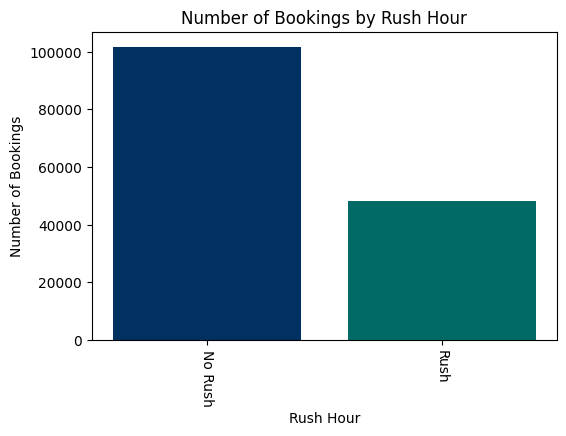

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values,color = ['#003161','#006A67'])
plt.xticks(rotation=-90)
plt.xlabel('Rush Hour')
plt.ylabel('Number of Bookings')
plt.title('Number of Bookings by Rush Hour')
plt.show()


**Insight**: Significant spike during  no rush hours.

###2️⃣Bookings by Time of Day

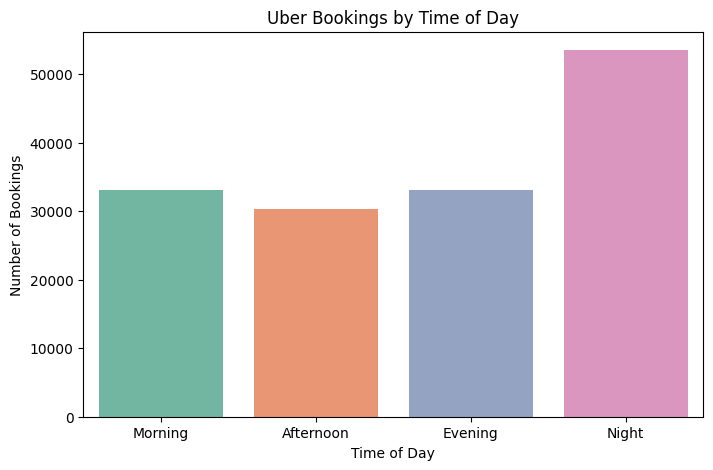

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='Time of Day', order=['Morning','Afternoon','Evening','Night'], palette="Set2")
plt.title("Uber Bookings by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Bookings")
plt.show()


**Insight:** Night rides dominate, followed by morning rush hour.

###3️⃣ Vehicle Type Preference

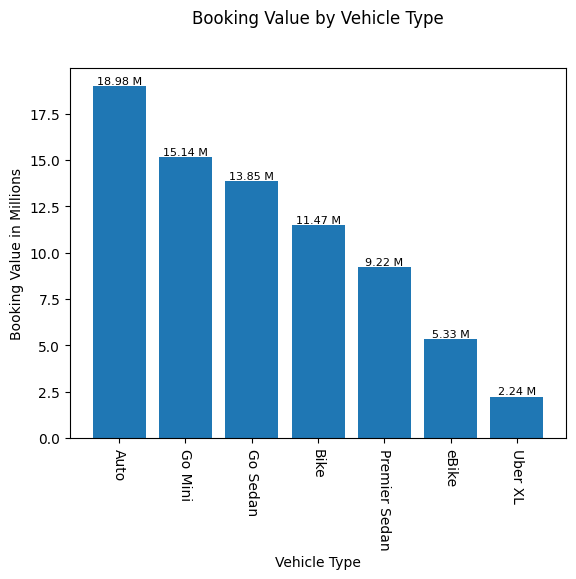

In [ ]:
booking_by_vehicle = df.groupby('Vehicle Type')['Booking Value'].sum().sort_values(ascending=False)
bars= plt.bar(booking_by_vehicle.index, booking_by_vehicle.values/1000000)
plt.xticks(rotation=-90)
plt.xlabel('Vehicle Type')
plt.ylabel('Booking Value in Millions')
plt.title('Booking Value by Vehicle Type',y=1.1)
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f'{bar.get_height():,.2f} M', ha='center', va='bottom',fontsize= 8)
plt.show()



**Insight:** Auto and Go Mini are most frequently used.Hence highly contributed in Booking values


###4️⃣ Payment Method Distribution

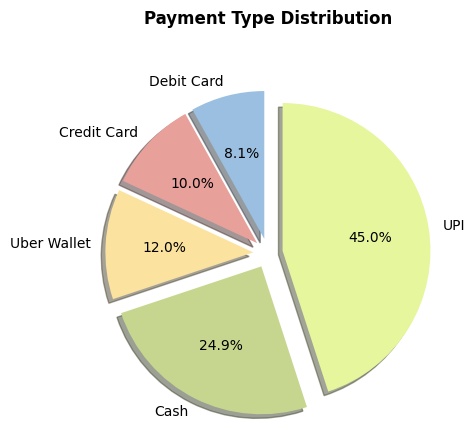

In [ ]:
payment_type_counts = df.groupby('Payment Method')['Payment Method'].count().sort_values(ascending=True)
colors = ['#9BBFE0','#E8A09A','#FBE29F','#C6D68F','#E6F69D']
explode = [0.1,0.1,0.1,0.1,0.1]
title_props = {
    'fontsize': 12,
    'fontweight': 'bold',
    'color': 'black',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
}
plt.pie(payment_type_counts, labels=payment_type_counts.index, colors=colors,autopct='%1.1f%%',shadow=True,explode=explode,normalize=True,startangle=90)
plt.title('Payment Type Distribution',fontdict=title_props,y=1.1)
plt.show()

**Insight:** Digital payments dominate over cash.

###5️⃣ Monthly Ride Trends

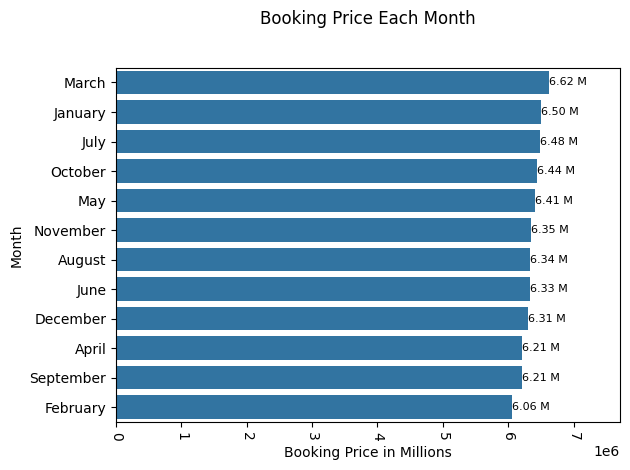

In [ ]:
month_booking_value = df.groupby('Month_name')['Booking Value'].sum().sort_values(ascending=False)
bars= sns.barplot(y= month_booking_value.index,x= month_booking_value.values)
plt.xticks(rotation=-90)
plt.xlim((0,month_booking_value.max()+1090000 ))
plt.ylabel('Month')
plt.xlabel('Booking Price in Millions')
plt.title('Booking Price Each Month',y=1.1)
for bar in bars.patches:
    plt.text(
        bar.get_width(),                           # x → bar length
        bar.get_y() + bar.get_height() /2,        # y → middle of the bar
        f'{bar.get_width()/1e6:,.2f} M',               # format text
        va='center', ha='left', fontsize=8         # align to the left of bar
    )
    plt.tight_layout()
plt.show()

**Insights** : High Sales in March

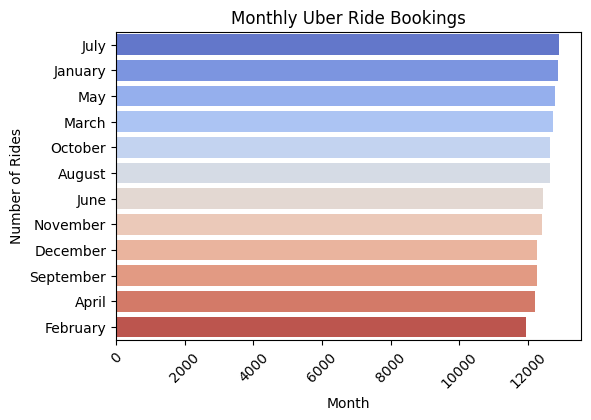

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, y='Month_name', order=df['Month_name'].value_counts().index, palette="coolwarm")
plt.title("Monthly Uber Ride Bookings")
plt.xlabel("Month")
plt.ylabel("Number of Rides")
plt.xticks(rotation=45)
plt.show()


**Insights : **  High demand in July , January and May


###6️⃣ Booking Value by Day of Week & Vehicle Type

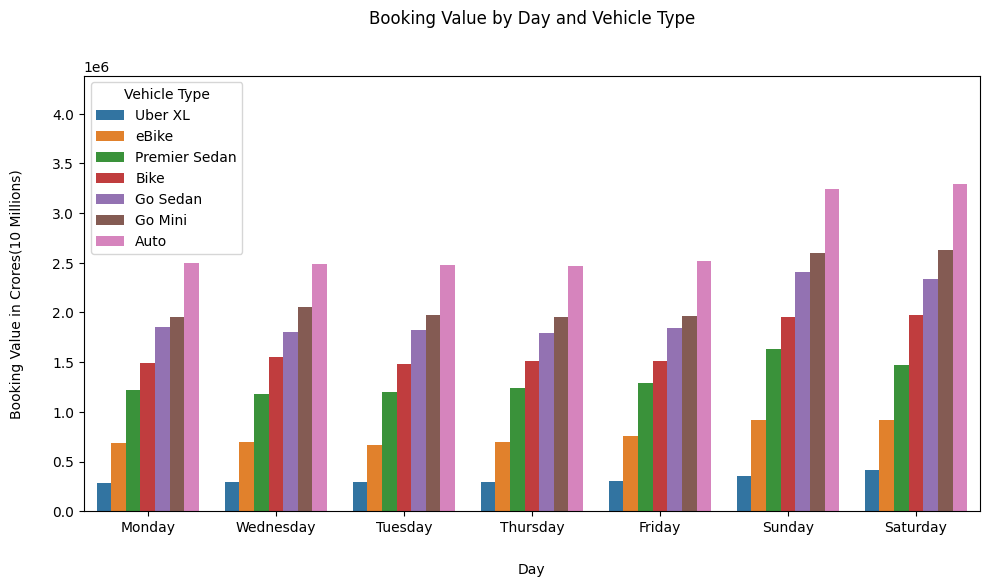

In [ ]:
day_booking_value = (
    df.groupby(['Day', 'Vehicle Type'])['Booking Value']
      .sum()
      .reset_index().sort_values('Booking Value')  # <- turns MultiIndex into columns
)

plt.figure(figsize=(10,6))
sns.barplot(
    data=day_booking_value,
    x='Day',
    y='Booking Value',
    hue='Vehicle Type',
    palette='tab10'
)

plt.ylim(0,day_booking_value['Booking Value'].max()+1090000)
plt.title("Booking Value by Day and Vehicle Type",y=1.1)
plt.xlabel('Day',labelpad=20.2)
plt.ylabel('Booking Value in Crores(10 Millions)' ,labelpad=20.2)
plt.tight_layout()
plt.show()

**Insight:** Weekends show higher average ride values for premium vehicles.
While Auto remain the best choice for customers.


### 7️⃣ Completed vs Incomplete Rides

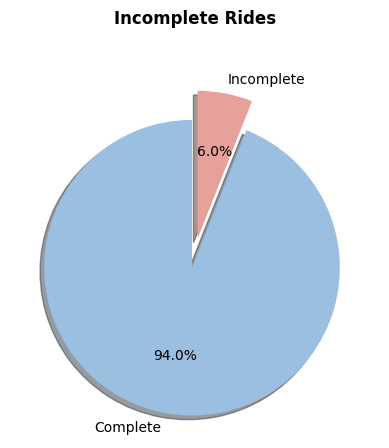

In [ ]:
incomRide = df.groupby('Incomplete Rides')['Incomplete Rides'].count().sort_values(ascending=False)
colors = ['#9BBFE0','#E8A09A']
explode = [0.1,0.1]
title_props = {
    'fontsize': 12,
    'fontweight': 'bold',
    'color': 'black',
    'verticalalignment': 'baseline',
    'horizontalalignment': 'center'
}
plt.pie(incomRide, labels=incomRide.index, colors=colors,autopct='%1.1f%%',shadow=True,explode=explode,normalize=True,startangle=90)
plt.title('Incomplete Rides',fontdict=title_props,y=1.1)
plt.show()


**Insight:** Most rides are successfully completed.

### 8️⃣ Ride Cancellations (Completed vs Canceled)

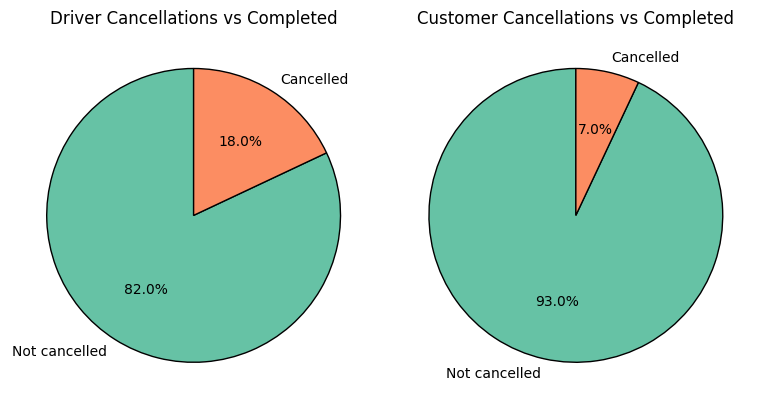

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(8,6))

df['Cancelled Rides by Driver'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2"),
    wedgeprops={'edgecolor': 'black'},
    ax=axes[0]
)
axes[0].set_title("Driver Cancellations vs Completed")
axes[0].set_ylabel("")


df['Cancelled Rides by Customer'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=sns.color_palette("Set2"),
    wedgeprops={'edgecolor': 'black'},
    ax=axes[1]
)
axes[1].set_title("Customer Cancellations vs Completed")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()


**Insights** : Mostly Rides are cancelled by ***Driver*** than customers


### 9️⃣Ride Cancellation Reason By Driver

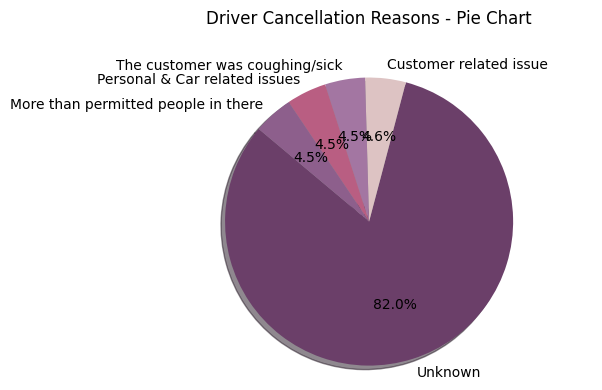

In [ ]:
cancellation_counts = df['Driver Cancellation Reason'].value_counts()
plt.figure(figsize=(6,4))
plt.pie(
    cancellation_counts,
    labels=cancellation_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    shadow=True,
    colors=['#6B3F69','#DDC3C3','#A376A2','#B95E82','#8D5F8C']
)

plt.title('Driver Cancellation Reasons - Pie Chart',loc='center',y=1.1)
plt.axis('equal')
plt.tight_layout()
plt.show()

# 📌 Conclusion

* Average Ride Distance : 24.64 kms

* Average Booking Value : ₹ 508.3

* Average Driver Rating : 4.23
* Average Customer Rating : 4.4

* Average VTAT : 8.46
* Average CTAT : 29.15


* Peak Demand : Demand Peaks at Night than Rush Hour.

  Reason : People consider public transport than private services during rush hour while at night private transportation services are safer.

* Vehicle Preference : Autos & Go Mini dominate.

* Payments : Digital payments are most common.

* Revenue Trend : Higher in March months.

* Reliability : Majority rides completed successfully.

* Cancelled : Mostly Rides are cancelled by Driver
